<h1><center>Les crimes à Boston</center></h1>
<div style="display:flex; align-items:center;">
    <ul>
        <li style="margin-top:60px">Analyser les données de la ville sur les crimes</li>
        <li style="margin-top:60px">Objectif : trouver des corrélations entre les crimes</li>
        <li style="margin-top:60px">Intéret : permettre une meilleure intervention de la police</li>
    </ul>
    <img src="https://previews.123rf.com/images/juan35mm/juan35mm1407/juan35mm140700067/29692611-boston-massachusetts-aerial-view.jpg"/ style="width:300px;height:300px;">
</div>

In [1]:
from data import load_data_viz_data
import seaborn as sns
import matplotlib.pyplot as plt
data = load_data_viz_data()
data[['LAT','LONG']] = data[['LAT','LONG']].astype('float64')
data.head()

,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,SHOOTING,OCCURRED_ON_DATE,LAT,LONG,NAME,LAT_POLICE_STATION,LONG_POLICE_STATION
0,I192068249,Other,0,2015-08-28 10:20:00,42.330119,-71.084251,Roxbury,42.328894,-71.085359
1,I182074094,Violence and harassment,0,2015-09-14 09:31:00,42.315142,-71.067047,Roxbury,42.328894,-71.085359
2,I182054888,Violence and harassment,0,2015-07-12 15:37:00,42.312243,-71.075499,Roxbury,42.328894,-71.085359
3,I182054888,Other,0,2015-07-12 15:37:00,42.312243,-71.075499,Roxbury,42.328894,-71.085359
4,I182054888,Other,0,2015-07-12 15:37:00,42.312243,-71.075499,Roxbury,42.328894,-71.085359


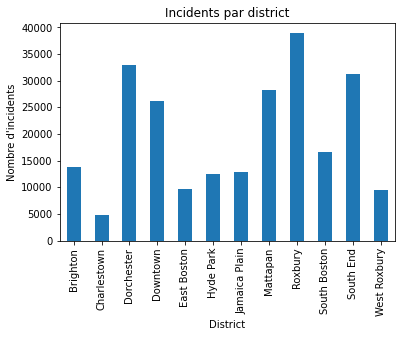

In [2]:
from IPython.core.display import display, HTML
display(HTML("<h2><center>Nombre d'incidents par district</center></h2>"))
ax = data.groupby('NAME').size().plot(kind='bar', title="Incidents par district");
ax.set_xlabel("District");
ax.set_ylabel("Nombre d'incidents");

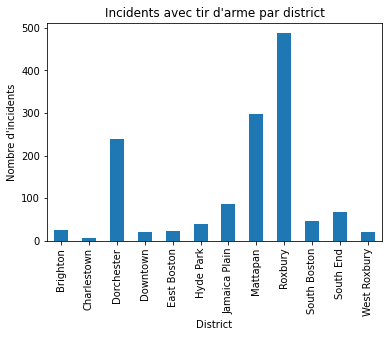

In [3]:
display(HTML("<h2><center>Nombre d'incidents impliquants des armes à feu par district</center></h2>"))

ax2 = data[data["SHOOTING"] ==1].groupby('NAME').size().plot(kind='bar', title="Incidents impliquant des tirs d'armes par district");
ax2.set_xlabel("District");
ax2.set_ylabel("Nombre d'incidents");

In [4]:
# Haversine distance function
from math import radians, sin, cos, asin, sqrt

def haversine_distance(lon1, lat1, lon2, lat2):
    """
    Compute distance (km) between two pairs of (lat, lng) coordinates
    See - (https://en.wikipedia.org/wiki/Haversine_formula)
    """
    
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    
    a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
    
    return 2 * 6371 * asin(sqrt(a))
data['DISTANCE_POLICE_STATION'] = data.apply(lambda x : haversine_distance(x['LONG'],x['LAT'],x['LONG_POLICE_STATION'],x['LAT_POLICE_STATION']),axis=1)

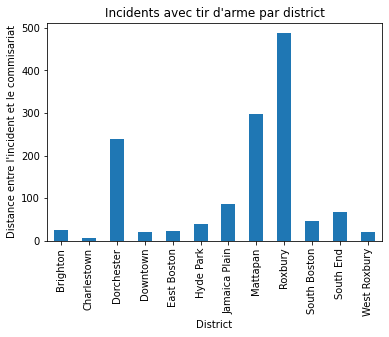

In [5]:
display(HTML("<h2><center>Distance des crimes au commisariat par district</center></h2>"))
ax2 = data[data["SHOOTING"] ==1].groupby('NAME').size().plot(kind='bar', title="Distance des crimes au commisariat par district");
ax2.set_xlabel("District");
ax2.set_ylabel("Distance entre l'incident et le commisariat");

<h1><center>Conclusion</center></h1>
<div style="display:flex; align-items:center;">
    <ul>
        <li style="margin-top:20px">Certaines zones sont plus touchées par les incidents et devraient faire l'objet de politiques adaptées pour réduire ces incidents </li>
        <li style="margin-top:40px">L'analyse des données de la police permet de mieux comprendre les enjeux sociaux économiques </li>
        <li style="margin-top:40px">L'analyse au fil de temps de ces données permet d'anticiper certains incidents et d'améliorer la prise en charge par la police</li>
        <li style="margin-top:40px">Pour en savoir plus, suivez ce lien : <a href="https://www.youtube.com/watch?v=HHCiNPtR1NI">Fouloscopie - Prédire le crime</a></li>
    </ul>
</div>